In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Loading a color image Gray scale
img = cv2.imread('Input/Image/WindowsFlags.jpg',0) # First parameter is image path and second is flag 0

### Display an image

In [4]:
cv2.imshow('W7Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

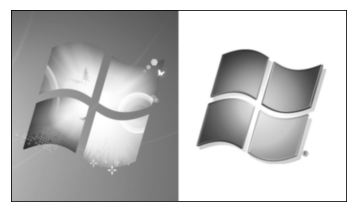

In [7]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([])
plt.yticks([]);


### Loading color image and plotting it in matplotlib 

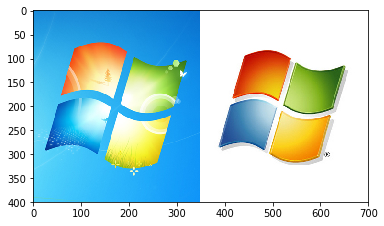

In [8]:
img = cv2.imread('Input/Image/WindowsFlags.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
#Writing an image to file
cv2.imwrite('Output/Image/w7gray.png',img)

True

In [5]:
#All together
import cv2
import numpy as np
from PIL import Image

img = cv2.imread('Input/Image/WindowsFlags.jpg',0)
cv2.imshow('W7Image',img)
k=cv2.waitKey(0)
if k == 27:# press 'esc' to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # press 's' to save and exit
    cv2.imwrite('Output/Image/w7gray.png',img)
    cv2.destroyAllWindows()



### Working with Videos

In [6]:
# capturing a video from built in camera and save the frames
cap = cv2.VideoCapture(0)

#define the codec and create videowriter obj
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('Output/Video/output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret,frame = cap.read()
    if ret == True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
#releae the capture
cap.release()
out.release()
cv2.destroyAllWindows()

### Playing video from file and convert it into frames

In [7]:
import cv2
import time,os
def video_file(video):
    start = time.time()
    cap = cv2.VideoCapture(video)
    fps = cap.get(cv2.CAP_PROP_FPS) # calculating frames per second
    totalFrames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # total frames
    print(totalFrames)
    videolength = totalFrames/fps
    
    count = 0
    flag  = True
    noOfFrames = 4
    interval = round(totalFrames/noOfFrames)
    while(flag):
        i=0
        while (i<interval-1):
            a,b  = cap.read()
            i += 1
        flag,frame = cap.read()
        #flip the frames
        frame=cv2.transpose(frame)
        frame=cv2.flip(frame,flipCode=1)

        name = 'Output/Video/frames/frame_'+str(count)+'.jpg'
        cv2.imwrite(name,frame)
        count += 1
    print('Time taken'+ str(time.time()-start))
    name = 'Output/Video/frames/frame_' +str(count - 1)+'.jpg'
    os.remove(name)
    cap.release()
    
     

In [8]:
video_file('Input//Video/Lcc_car7.mp4')

60
Time taken0.6779580116271973
